# Cross reference Capak and Hunt catalogs

GDW / 2018apr12

In [10]:
%matplotlib inline

from astropy.io import ascii    
import numpy as np
import matplotlib.pyplot as plt

## Read COSMOS catalog

In [11]:
cosmos_infile = '../Capak/deimos_redshifts.tbl'

In [12]:
cosmos = ascii.read( cosmos_infile)

In [13]:
cosmos.info

<Table masked=True length=10770>
  name   dtype  n_bad
------- ------- -----
     ID    str8   216
     ra float64     0
    dec float64     0
    sel   int64     0
   imag float64   125
   kmag float64   485
  zspec float64  2240
  Qflag   int64     0
      Q float64     0
Remarks   str70  3533

select cosmos targets in range 0.5<z<0.6

In [14]:
buf = np.where( (cosmos['Q'] == 2.0) & (cosmos['zspec'] > 0.5) & (cosmos['zspec'] < 0.6))
good = buf[0]
cosmos_good = cosmos[good]
n = len(cosmos_good)
print n

275


In [15]:
ra1  = np.array(cosmos_good['ra'])
dec1 = np.array(cosmos_good['dec'])

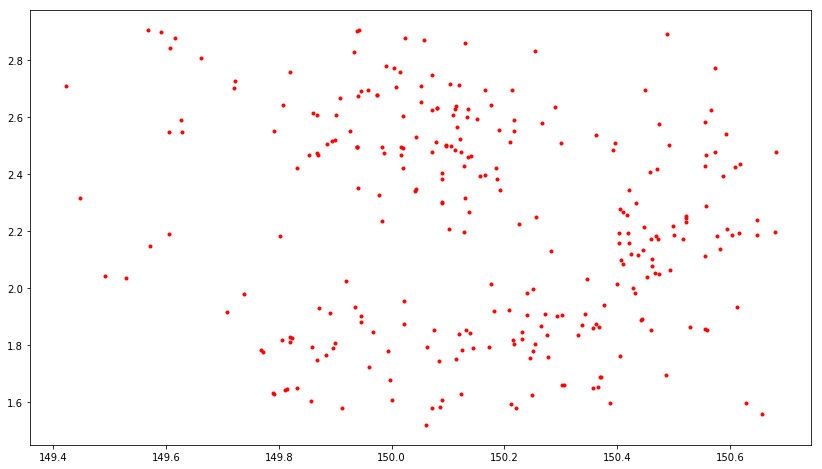

In [23]:
plt.figure(figsize=(14,8))
plt.plot( ra1, dec1, 'r.')

## Read Lucas's Catalog

In [17]:
infile = '../COSMOS_LCBG_CATALOG/COSMOS_LAMBDAR_CATALOG.csv'
data = ascii.read( infile, format='csv', guess=False)

In [18]:
buf = np.where( (data['SG_MASTER'] == 0) & (data['Z_BEST'] > 0.5) 
               & (data['Z_BEST'] < 0.6) & (data['Z_USE'] < 3) 
               & (data['LAMBDAR_COSMOS2015_sep'] < 0.8))
good = buf[0]
lcbg = data[good]

In [19]:
ra2  = np.array(lcbg['RA'])
dec2 = np.array(lcbg['DEC'])

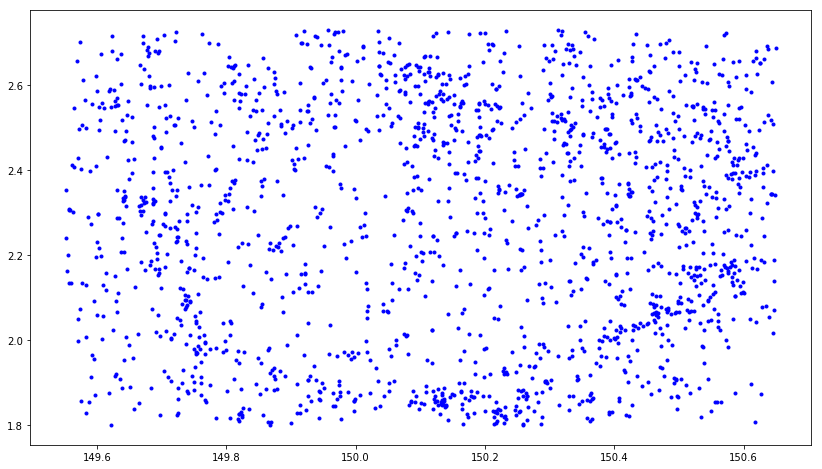

In [20]:
plt.figure(figsize=(14,8))
plt.plot( ra2, dec2, 'b.' )

## Prepare to match catalogs

In [21]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [36]:
c1 = SkyCoord(ra=ra1*u.degree, dec=dec1*u.degree)
c2 = SkyCoord(ra=ra2*u.degree, dec=dec2*u.degree)

In [37]:
idx, d2d, d3d = c2.match_to_catalog_sky(c1)

In [38]:
print len(idx)
print idx

1816
[234  54  23 ..., 178 197 255]


In [42]:
print d2d

[u'0d03m05.1454s' u'0d00m57.8144s' u'0d00m05.4932s' ..., u'0d01m44.6875s'
 u'0d02m39.2899s' u'0d00m00.2571s']


plot separation...

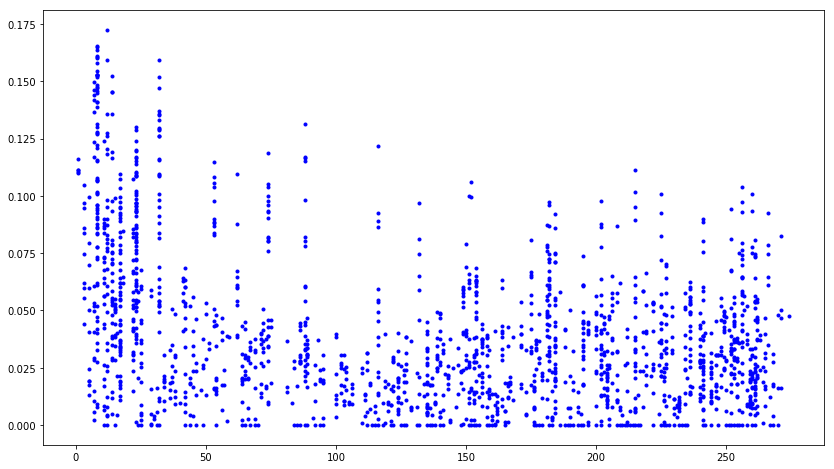

In [50]:
plt.figure(figsize=(14,8))
plt.plot( idx, d2d, 'b.' )

select matches that agree within an arcsec

In [51]:
max_separation = 1.0*u.arcsec
buf = np.where( d2d < max_separation)
good = buf[0]

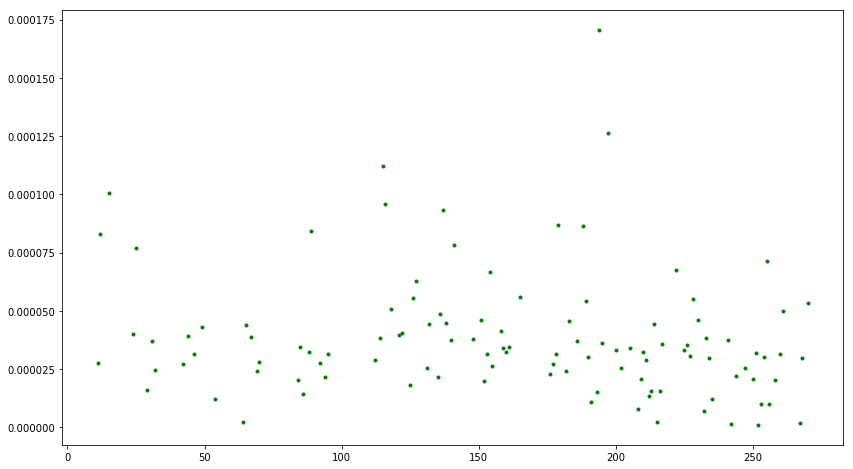

In [52]:
plt.figure(figsize=(14,8))
plt.plot( idx[good], d2d[good], 'g.' )

In [53]:
good_idx = idx[good]
cosmos_match = cosmos_good[good_idx]

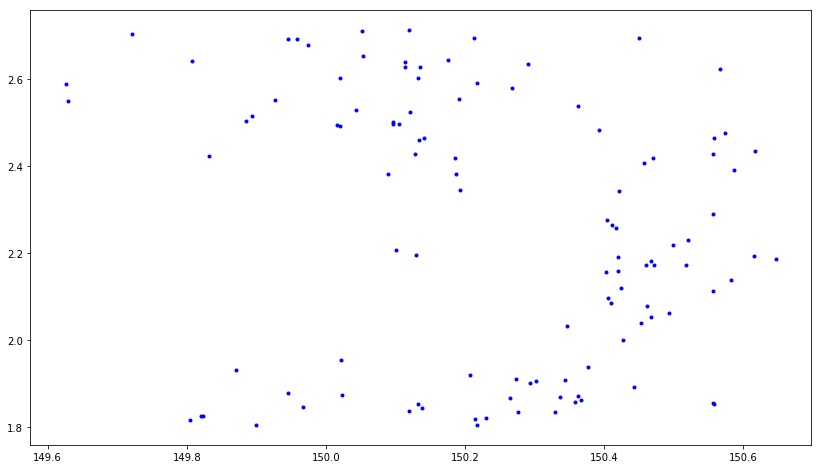

In [54]:
plt.figure(figsize=(14,8))
plt.plot( cosmos_match['ra'], cosmos_match['dec'], 'b.' )

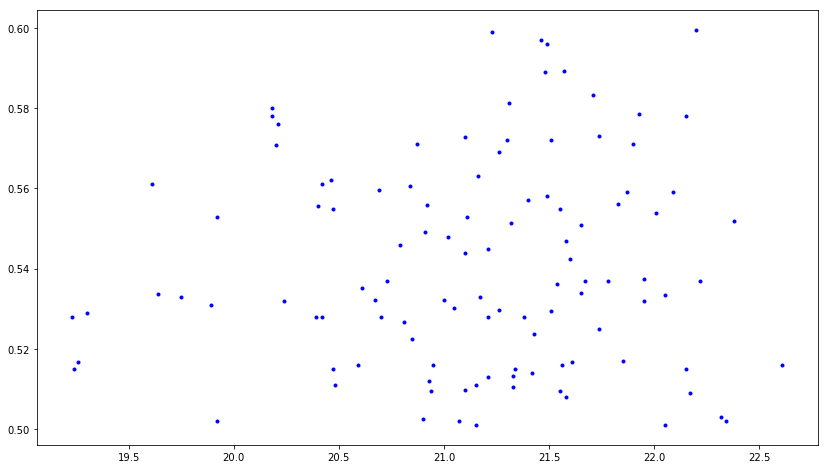

In [55]:
plt.figure(figsize=(14,8))
plt.plot( cosmos_match['imag'], cosmos_match['zspec'], 'b.' )

In [56]:
print len(good_idx)

110
